<a href="https://colab.research.google.com/github/Andrei198203/new3_1_final-project/blob/main/new_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [13]:
import pandas as pd
from string import punctuation

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.optimizers import Adam
from keras.datasets import fashion_mnist
from keras import models
from keras import layers
from keras import optimizers
from keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
# from keras.preprocessing  import  image /

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import h5py

In [14]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [15]:
print('x_train Shape: {}'.format(x_train.shape))
print('x_test Shape: {}'.format(x_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape: {}'.format(y_test.shape))

x_train Shape: (50000, 32, 32, 3)
x_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000, 1)
y_test Shape: (10000, 1)


In [16]:
num_classes = 10
classes = { 0:"airplane(літак)",
            1: "automobile(автомобіль)",
            2: "bird(птах)",
            3: "cat(кот)",
            4: "deer(олень)",
            5: "dog(пес)",
            6: "frog(жаба)",
            7: "horse(кінь)",
            8: "ship(корабель)",
            9: "truck(вантажівка)"}

In [17]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.3
    )
datagen.fit(x_train)

In [18]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Convert tags to categories


y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}\ny_train: {y_train.shape}, y_test: {y_test.shape}")

x_train: (50000, 32, 32, 3), x_test: (10000, 32, 32, 3)
y_train: (50000, 10), y_test: (10000, 10)


In [19]:
reg=None
reg2=None
num_filters=32
ac='relu'
# adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# opt=adm
drop_dense=0.5
drop_conv=0
input_shape = (32,32, 3)

model = Sequential(name='cifar10')

# Слой 2D-свертки (например, пространственная свертка изображений)
model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg,  input_shape=(32,32, 3), padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac, kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac, kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(2048, activation=ac, kernel_regularizer=reg2, name='hidden_1'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(2048, activation=ac, kernel_regularizer=reg2, name='hidden_2'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(1024, activation=ac, kernel_regularizer=reg2, name='hidden_4'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(512, activation=ac, kernel_regularizer=reg2, name='hidden_5'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation='softmax', name='output'))

In [20]:
model.summary()

Model: "cifar10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_10 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_11 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                           

In [21]:
# Компиляция модели
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy'],
    run_eagerly=True
)

In [ ]:
history=model.fit( x_train, y_train,
                  batch_size=256,
                  steps_per_epoch = len(x_train) / 256,
                  epochs=20,
                  validation_data=(x_test, y_test) )

Epoch 1/20
195/195 [==============================] - 675s 3s/step - loss: 1.8634 - accuracy: 0.4014 - val_loss: 4.6703 - val_accuracy: 0.1571
Epoch 2/20
195/195 [==============================] - 673s 3s/step - loss: 1.1612 - accuracy: 0.5924 - val_loss: 2.3225 - val_accuracy: 0.2994
Epoch 3/20
195/195 [==============================] - 661s 3s/step - loss: 0.9008 - accuracy: 0.6815 - val_loss: 0.9790 - val_accuracy: 0.6571
Epoch 4/20
195/195 [==============================] - 650s 3s/step - loss: 0.7413 - accuracy: 0.7427 - val_loss: 0.8701 - val_accuracy: 0.7061
Epoch 5/20
195/195 [==============================] - 651s 3s/step - loss: 0.6294 - accuracy: 0.7817 - val_loss: 0.8061 - val_accuracy: 0.7322
Epoch 6/20
195/195 [==============================] - 662s 3s/step - loss: 0.5500 - accuracy: 0.8091 - val_loss: 0.9928 - val_accuracy: 0.7156
Epoch 7/20
195/195 [==============================] - 654s 3s/step - loss: 0.4716 - accuracy: 0.8369 - val_loss: 0.8375 - val_accuracy: 0.7360

In [22]:
result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Percentage of test data accuracy: ", round(result_test[1] * 100, 2))
print("Percentage of training data accuracy: ", round(result_train[1] * 100, 2))

1563/1563 [==============================] - 224s 143ms/step - loss: 2.3023 - accuracy: 0.1245
Percentage of test data accuracy:  12.18
Percentage of training data accuracy:  12.45


In [23]:
epochs = range(1, len(history.history["accuracy"]) + 1)

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["accuracy"],   label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy")
plt.title("Training and validation accuracies")
plt.legend()
plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["loss"],  label="Training loss")
plt.plot(epochs, history.history["val_loss"], label="Validation loss")
plt.title("Training and validation losses")
plt.legend()
plt.show()

NameError: name 'history' is not defined

In [ ]:
# model.save("basesd_model_new.hdf5")

In [24]:
model.save("basesd_model_new.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# model = models.load_model("basesd_model_new.h5")

1/1 [==============================] - 0s 102ms/step
Клас номер: 7
Клас img : horse(кінь)


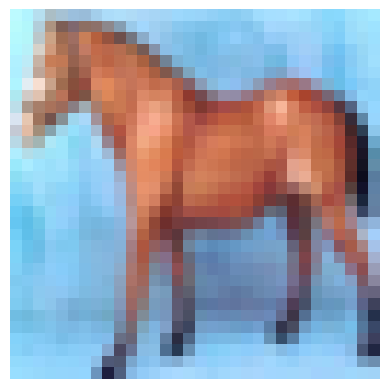

In [25]:
imege_number = 1170

x = np.expand_dims(x_test[imege_number], axis=0)
prediction = model.predict(x)
prediction = np.argmax(prediction[0])

# classes[y_train[imege_number][0]]
plt.axis('off')

plt.imshow(x_test[imege_number] ,  cmap=plt.cm.binary)

print(f"Клас номер: {prediction}")
print(f"Клас img : {classes[prediction]}")